In [5]:
import os
import re
import pathlib
import time
import itertools
import glob
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from IPython import display

from generator import *
from discriminator import *
from loss import *
from utils import *
from train import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
cities = ['la','bos','nyc','chi','sp', 'bue', 'joh', 'syd', 'tok', 'par', 'mex', 'sea', 'aus']
dates = ['winter', 'spring', 'summer']
zoom = 16
shadow_path = 'data/shadows/'
height_path = 'data/heights/'
checkpoint_name = 'all-all'
checkpoint_path = 'training_checkpoints/%s'%(checkpoint_name)

TILES_PER_CITY = 270
BATCH_SIZE = 2

In [6]:
generator = Generator(512, 512)
discriminator = Discriminator(512, 512)
checkpoint = restore(checkpoint_path, generator, discriminator)

In [7]:
train_dataset, test_dataset = get_train_test(height_path, shadow_path, cities, dates, zoom, TILES_PER_CITY, BATCH_SIZE)

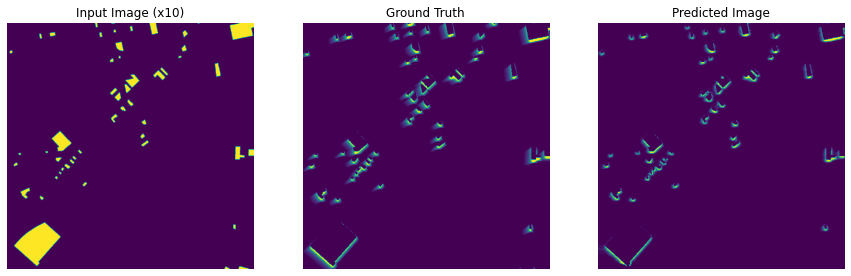

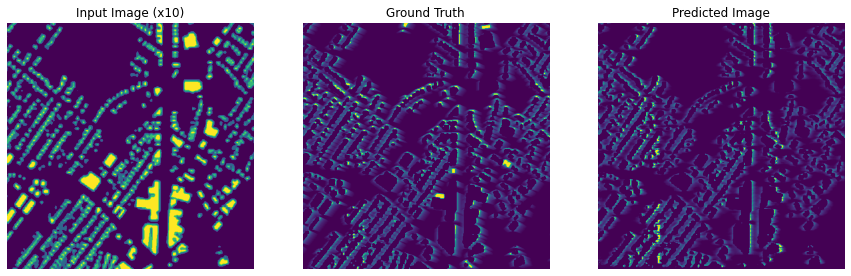

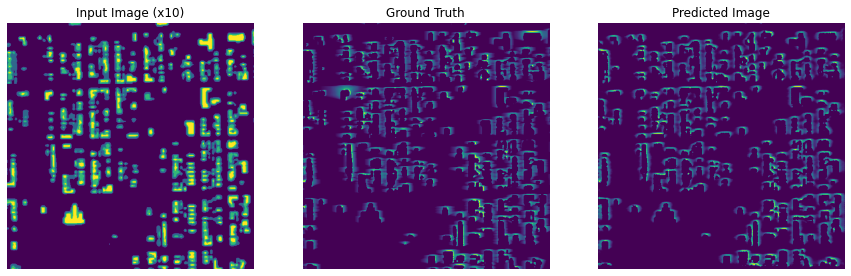

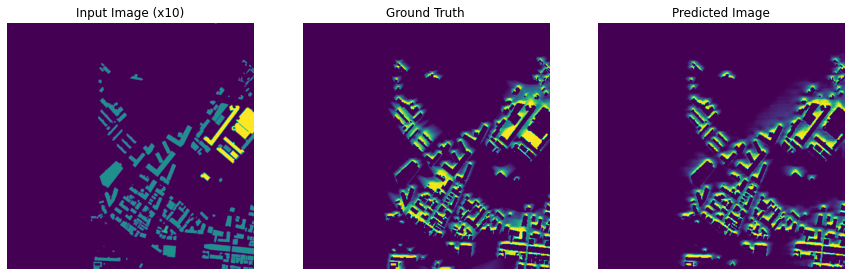

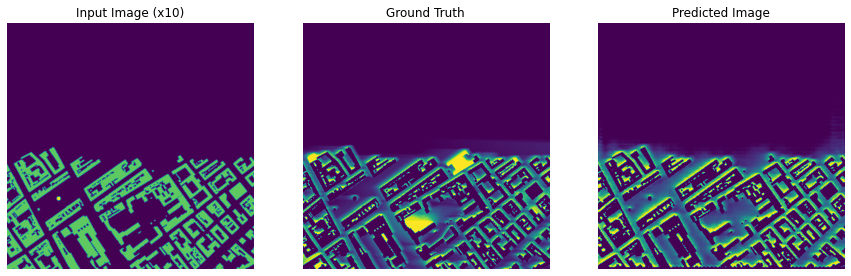

In [8]:
for example_input, example_target, example_lat, example_dat in test_dataset.take(5):
    generate_images(generator, example_input, example_lat, example_dat, example_target)

In [ ]:
rmses = []
for test_input, test_target, test_latitude, test_date in test_dataset:
    prediction = generator([test_input, test_latitude, test_date], training=True)
    
    rmse = compute_rmse(prediction, test_target)
    rmses.append(rmse)
    
print(np.average(rmses))
df = pd.DataFrame(rmses, columns=['rmse'])
df.to_csv('results/%s-%d.csv'%(checkpoint_name,zoom), index=False, header=True)